In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
df = pd.read_csv(
    'data/histdata/HISTDATA_COM_ASCII_EURUSD_M1_2023/DAT_ASCII_EURUSD_M1_2023.csv',
    header=None,
    index_col='timestamp',
    delimiter=';',
    names=['timestamp', 'open', 'high', 'low', 'close', 'volume'],
    parse_dates=['timestamp'],
    date_format='%Y%m%d %H%M%S'
)

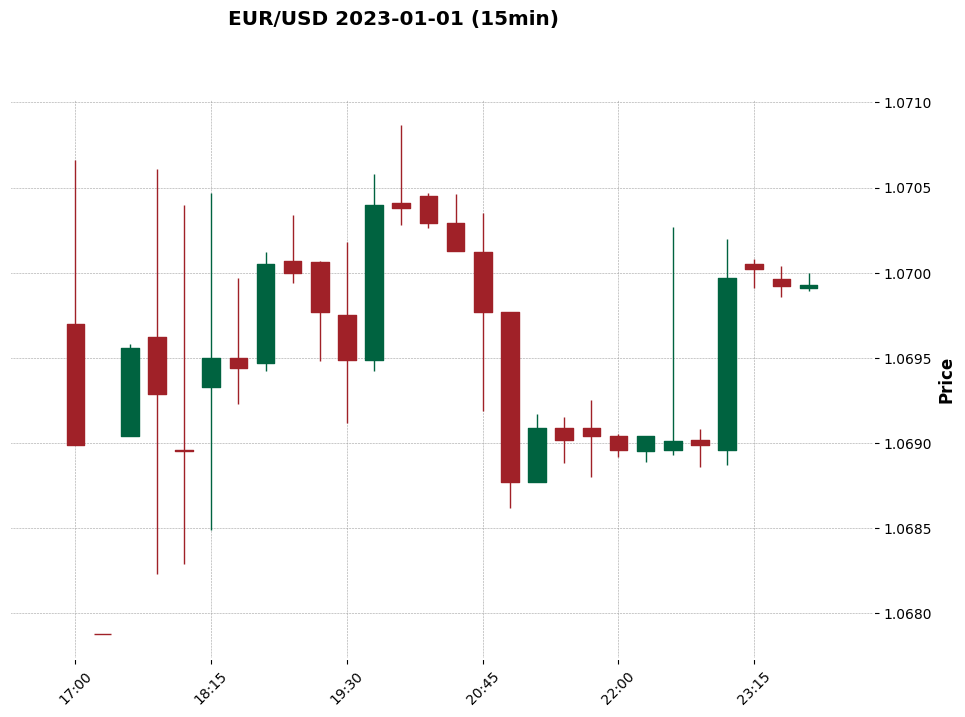

In [5]:
# 2023-01-01のデータを抽出
df_jan1 = df[df.index.date == pd.Timestamp('2023-01-01').date()]

# 15分足にリサンプリング
df_jan1_15m = df_jan1.resample('15min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

# ろうそく足チャートを表示
mpf.plot(df_jan1_15m, 
         type='candle',
         style='charles',
         title='EUR/USD 2023-01-01 (15min)',
         ylabel='Price',
         figsize=(12, 8))

plt.show()

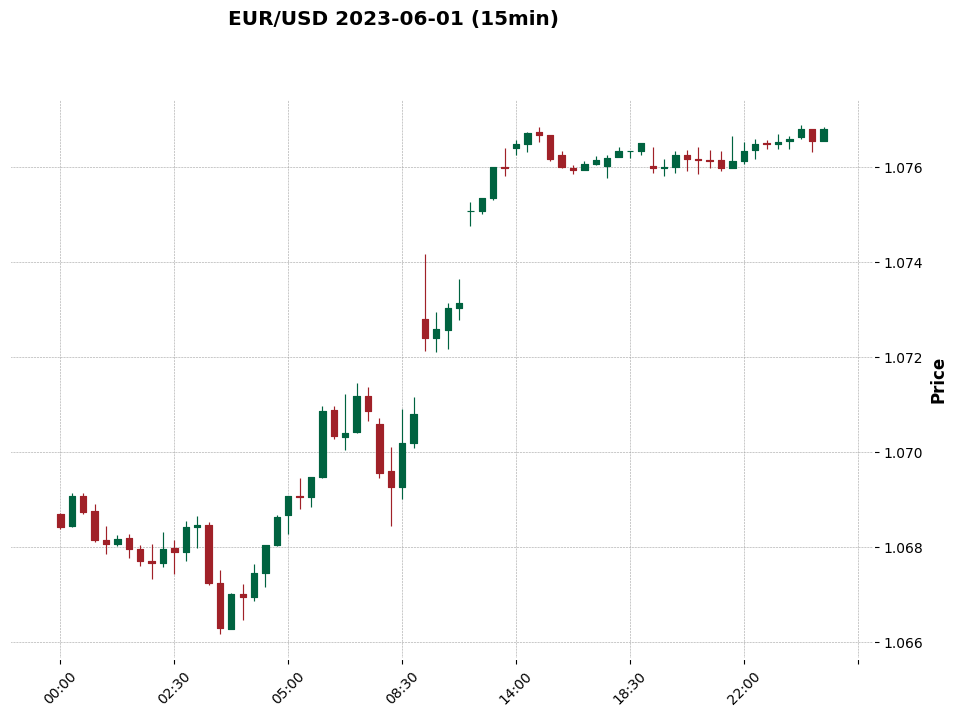

In [6]:
# 2023-06-01のデータを抽出
df_jun1 = df[df.index.date == pd.Timestamp('2023-06-01').date()]

# 15分足にリサンプリング
df_jun1_15m = df_jun1.resample('15min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

# ろうそく足チャートを表示
mpf.plot(df_jun1_15m, 
         type='candle',
         style='charles',
         title='EUR/USD 2023-06-01 (15min)',
         ylabel='Price',
         figsize=(12, 8))

plt.show()